In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns

In [4]:
data=pd.read_csv("GenZ_DatingApp_Data.csv")

In [7]:
data.head 

<bound method NDFrame.head of      User_ID  Age      Gender   Location      Education     Occupation  \
0          1   20  Non-binary  Bangalore  Undergraduate     Freelancer   
1          2   24      Female      Delhi  Undergraduate  Part-time Job   
2          3   24  Non-binary    Kolkata  Undergraduate         Intern   
3          4   22  Non-binary      Delhi       Graduate  Full-time Job   
4          5   18        Male      Delhi       Graduate         Intern   
..       ...  ...         ...        ...            ...            ...   
495      496   23      Female     Mumbai  Undergraduate         Intern   
496      497   23        Male     Mumbai   Postgraduate         Intern   
497      498   22        Male  Hyderabad       Graduate     Freelancer   
498      499   21      Female    Kolkata       Graduate        Student   
499      500   22        Male     Mumbai       Graduate  Part-time Job   

    Primary_App Secondary_Apps Usage_Frequency Daily_Usage_Time  \
0         Hing

In [23]:
#Are younger or older Gen-Z users more active on dating apps

# Define age groups
bins = [18, 20, 23, 25]
labels = ['18-20', '21-23', '24-25']
# Add a new column for age groups
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Display the updated dataframe
print(data[['Age', 'Age_Group']].head())

   Age Age_Group
0   20     21-23
1   24     24-25
2   24     24-25
3   22     21-23
4   18     18-20


In [27]:
# Map Usage_Frequency to numerical values
usage_frequency_map = {
    'Daily': 7,
    'Weekly': 1,
    'Monthly': 0.25
}
data['Usage_Frequency_Score'] = data['Usage_Frequency'].map(usage_frequency_map)
# Calculate average usage frequency score by age group
avg_usage_frequency = data.groupby('Age_Group')['Usage_Frequency_Score'].mean()
# Display the results
print("Average Usage Frequency Score by Age Group:")
print(avg_usage_frequency)

Average Usage Frequency Score by Age Group:
Age_Group
18-20    2.796371
21-23    2.650000
24-25    3.137755
Name: Usage_Frequency_Score, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17168\1221841066.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_usage_frequency = data.groupby('Age_Group')['Usage_Frequency_Score'].mean()


In [ ]:
# we can see that the younger gen Z are more actif on the dating app

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17168\48947172.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_usage, x='Location', y='User_Count', palette='Reds')


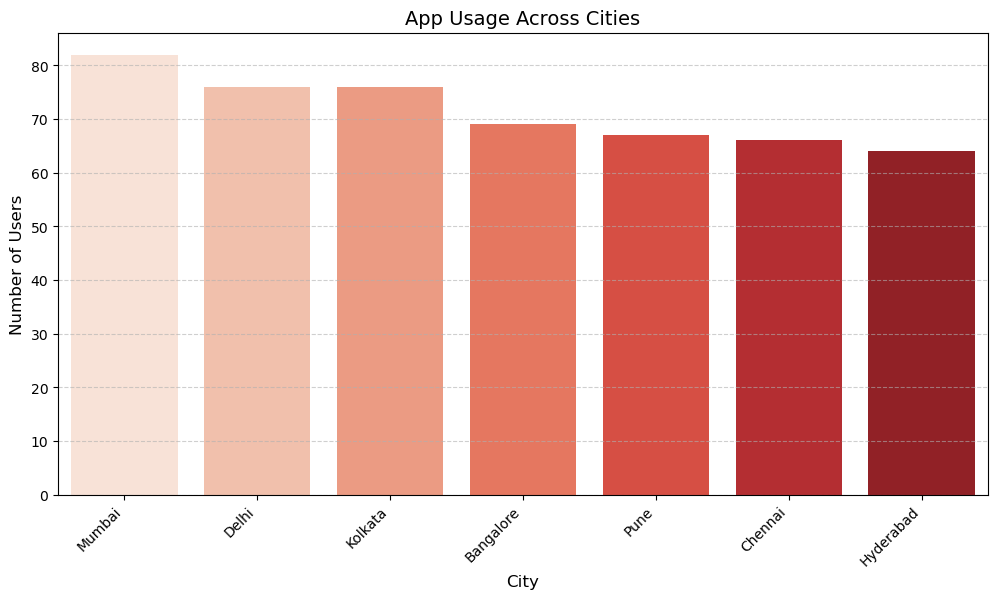

In [40]:
#Does dating app preference change over time?

import matplotlib.pyplot as plt
import seaborn as sns

# Group data by location (city) and count users
city_usage = data.groupby('Location').size().reset_index(name='User_Count')

# Ensure 'city_usage' is not empty before plotting
if not city_usage.empty:
    # Sort cities by user count (descending)
    city_usage = city_usage.sort_values(by='User_Count', ascending=False)

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(data=city_usage, x='Location', y='User_Count', palette='Reds')

    # Titles and labels
    plt.title('App Usage Across Cities', fontsize=14)
    plt.xlabel('City', fontsize=12)
    plt.ylabel('Number of Users', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add grid for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Show plot
    plt.show()
else:
    print("Warning: 'city_usage' DataFrame is empty. Check data processing steps.")

In [42]:
# yes its change over time 


Columns in dataset: Index(['User_ID', 'Age', 'Gender', 'Location', 'Education', 'Occupation',
       'Primary_App', 'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Satisfaction', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities', 'Age_Group',
       'Daily_Usage_Time_Hours', 'Usage_Frequency_Score'],
      dtype='object')


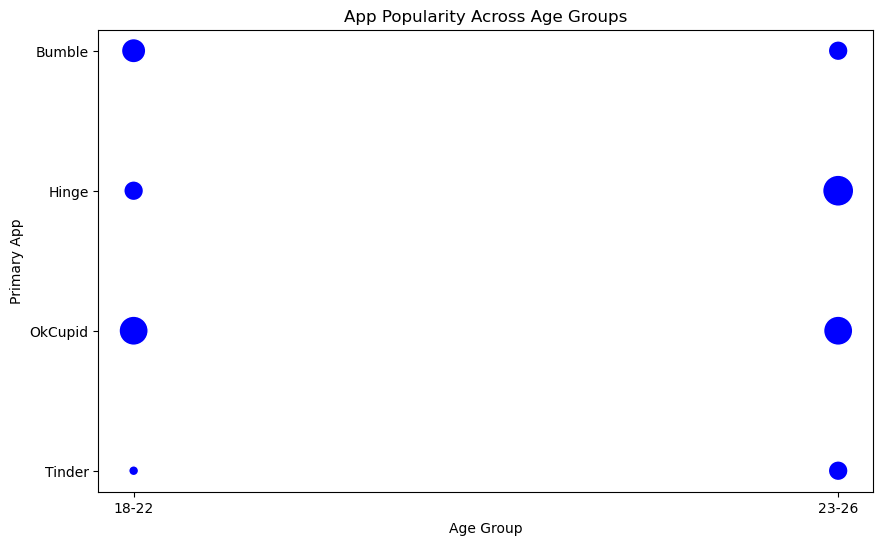

In [44]:
#Do metro city users behave differently from users in smaller towns?


# Print column names to check for errors
print("Columns in dataset:", data.columns)
data.columns = data.columns.str.strip()
# Check if 'Age' column exists to create 'Age_Group'
if 'Age' not in data.columns:
    print("Error: 'Age' column not found in dataset.")
    exit()

# Create 'Age_Group' column
age_bins = [18, 22, 26, 30]
age_labels = ['18-22', '23-26', '27-30']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Check if 'Primary_App' column exists
if 'Primary_App' not in data.columns:
    print("Error: 'Primary_App' column not found in dataset.")
    exit()

# Grouping data: Count users per (Age_Group, Primary_App)
age_app_popularity = data.groupby(['Age_Group', 'Primary_App'], observed=True).size().reset_index(name='User_Count')

# Check if data is empty
if age_app_popularity.empty:
    print("Warning: No data available for plotting.")
else:
    # Plot the bubble chart
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=age_app_popularity, x='Age_Group', y='Primary_App',
                    size='User_Count', sizes=(50, 500), legend=False, color='blue')
    
    # Titles and labels
    plt.title('App Popularity Across Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Primary App')
    
    # Show the plot
    plt.show()

In [46]:
# yes ,metro city users behave differently from the smaller towns